<pre> 
 Copyright 2018-2019 University of Padua, Italy

 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.

 Author: Nicola Ferro (ferro@dei.unipd.it)
 Author: Maria Maistro (maistro@dei.unipd.it)
</pre>

<h1>Configuration of the script</h1>

<p>Configure the script as follows:</p>
<ul>
    <li><code>qrels_file</code>: path to the text file containing the qrels/pool;</li>
    <li><code>run_file</code>: path to the text file containing the run to evaluate.</li>
</ul>


In [1]:
%matplotlib inline

In [2]:
import mamba
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

# set the dimension of the figures
plt.rcParams['figure.figsize'] = [10, 10]

plt.rcParams['font.size'] = 14

In [3]:
# path to the qrels
qrels_file = "../../data/collection/CLEF2009-Monolingual-Persian/pool/AH-PERSIAN-CLEF2009.txt"

# path to the runs
run_file1 = "../../data/collection/CLEF2009-Monolingual-Persian/runs/JHUFA4R100TD.txt"
run_file2 = "../../data/collection/CLEF2009-Monolingual-Persian/runs/UNINEPE2.txt"

<h1>Importing the runs</h1>

<p>Use <code>mamba.import_run</code> to import the runs.</p>


In [4]:
run1 = mamba.import_run(run_file1)
run2 = mamba.import_run(run_file2)

<h1>Importing qrels</h1>

<p>Use <code>mamba.import_qrels</code> to import the qrels.</p>

In [5]:
qrels, rb = mamba.import_qrels(qrels_file)

<h1>Assessing the runs</h1>

<p>Use <code>mamba.assess_run</code> to assess the runs with respect to the <code>qrels</code>.</p>

In [6]:
jrun1 = mamba.assess_run(run1, qrels) 
jrun2 = mamba.assess_run(run2, qrels) 

<h1>Computing Average Precision for the different runs</h1>

<p>Use <code>mamba.average_precision</code> to compute average precision of each run.</p>

In [7]:
ap1 = mamba.average_precision(jrun1, rb)
ap2 = mamba.average_precision(jrun2, rb)

<h1>Performing the Student's t test using library functions</h1>

<p>We perform the <i>paired two samples</i> Student's t test by using the <code>scipy.stats.ttest_rel</code> function.

In [8]:
score1 = [x[1] for x in ap1]
score2 = [x[1] for x in ap2] 

t, p = sts.ttest_rel(score1, score2)


print('t statistics')
print(t)

print('\np-value')
print(p)



t statistics
1.2337951665999667

p-value
0.22316458281419568


<h1>Performing the Student's t test by yourself</h1>

t statistics
1.2337951665999667

p-value
0.2231645828141957

t critical value
2.009575234489209


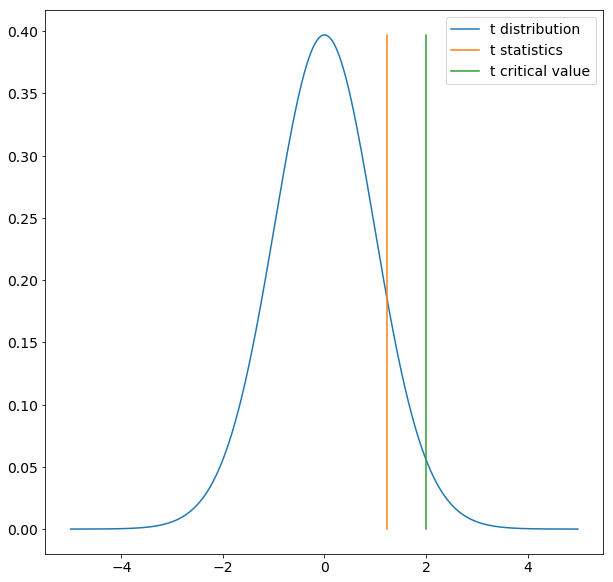

In [9]:

# the significance level
alpha = 0.05

# the difference of the scores
d =  [x - y for (x, y) in zip(score1, score2)]

# compute the sample mean and sample variance
mean = sum(d)/len(d)
var = sum([math.pow(x - mean, 2) for x in d])/(len(d) - 1)

# compute the t statisstics
t = mean / math.sqrt(var / len(d))

# degrees of freedom
df = len(d) - 1

# p-value of the t distribution
p = 2 * (1 - sts.t.cdf(abs(t), df = df))

print('t statistics')
print(t)

print('\np-value')
print(p)

# compute the t critical value
tCrit = sts.t.ppf(1 - alpha/2, df)

print('\nt critical value')
print(tCrit)

# generate x values in the range [-5, 5] step .01
x = [(j-500) / 100 for j in range(1000) ]

# compute the t distribution
y = [sts.t.pdf(j, df = df) for j in x]

plt.plot(x, y, label='t distribution')
plt.plot([t, t], [0, max(y)], label='t statistics')
plt.plot([tCrit, tCrit], [0, max(y)], label='t critical value')

axes = plt.gca()
axes.legend()